# FINAL PROJECT - DV

# TripAdvisor Restaurants Visualization and analyse

# PRE-PROCESSING AND GETTING THE DATA

Group16 with the members:
* Andreia Cabral
* Bernardo Pereira
* João Tiago Costa
* Marta Costa

Janeiro 2019

## Data Extraction

First, we want the information about restaurants from European Cities of TripAdvisor website
(source: https://www.kaggle.com/damienbeneschi/krakow-ta-restaurans-data-raw)

In [173]:
#importing the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
#reading file
data = pd.read_csv('TripAdvisor.csv')  

In [175]:
# Let's take a first look into our data:
data.head(5)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


## Data Transformation

### Data Cleaning

Because the previous data is a mess, we need to clean it for latter analysis.

In [176]:
# Separating cuisine categories into different columns:
data['Cuisine Style'] = data['Cuisine Style'].map(lambda x: str(x))
data['Cuisine Style'] = data['Cuisine Style'].map(lambda x: x.replace("'",""))
data['Cuisine Style']=data['Cuisine Style'].str.lower()
data['Cuisine Style'] = data['Cuisine Style'].map(lambda x: x[1:len(x)-1])
data[['St1','St2','St3','St4','St5','St6','St7','St8','St9','St10','St11']] = data['Cuisine Style'].str.split(',',n=10,expand=True)

In [177]:
# Separating reviews from its dates:
data['Reviews'] = data['Reviews'].astype(str)
data['Reviews'] = data['Reviews'].str.replace('[','')
data[['Reviews','Date']] = data.Reviews.str.split('],', n=1,expand=True)

In [178]:
#treating Reviews column:
data['Reviews'] = data['Reviews'].str.replace('"','\'').str.replace(';',',')
data[['Review1','Review2']] = data.Reviews.str.split('\', \'', n=1,expand=True)
data['Review1'] = data['Review1'].astype(str)
data['Review2'] = data['Review2'].astype(str)
data['Review1'] = data['Review1'].str.strip('\'').str.lower() #erasing the first and last "'" from the string
data['Review2'] = data['Review2'].str.strip('\'').str.lower()
data['Review1'] = data['Review1'].replace('',np.nan).replace('nan',np.nan)
data['Review2'] = data['Review2'].replace('',np.nan).replace('none',np.nan)

In [179]:
#treating Reviews dates:
data['Date'] = data['Date'].str.replace('\'','') #replacing all " ' " for nothing
data[['Date_Review1','Date_Review2']] = data.Date.str.split(',', n=1,expand=True) #split into 2 new columns
data['Date_Review1'] = data['Date_Review1'].str.replace(']','').str.replace('\'','').str.replace('[','')
data['Date_Review2'] = data['Date_Review2'].str.replace(']','').str.replace('\'','').str.replace('[','')
data['Date_Review1'] = pd.to_datetime(data['Date_Review1'],errors='coerce') #changing the format of the date 
data['Date_Review2'] = pd.to_datetime(data['Date_Review2'],errors='coerce')

In [180]:
#giving a name to each price range:
data['Price Tag'] = data['Price Range'].str.replace('\$\$ \- \$\$\$','medium').str.replace('\$','cheap').str.replace('cheapcheapcheapcheap','expensive')

In [182]:
#putting all the columns in lower cases:
data['City'] = data['City'].str.lower()
data['Name'] = data['Name'].str.lower()

In [181]:
#because we are going to use just 4 styles (later we are going to explain why),
#there are some of them that have spaces before the words:
data['St1']=data['St1'].str.strip()
data['St2']=data['St2'].str.strip()
data['St3']=data['St3'].str.strip()
data['St4']=data['St4'].str.strip()

In [183]:
#dropping the columns that don't matter
data.drop(['Date','Reviews','Unnamed: 0','Price Range'],axis=1, inplace= True) 

In [184]:
#take a look into the data:
data.head(1)

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,URL_TA,ID_TA,St1,St2,...,St7,St8,St9,St10,St11,Review1,Review2,Date_Review1,Date_Review2,Price Tag
0,martine of martine's table,amsterdam,"french, dutch, european",1.0,5.0,136.0,/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080,french,dutch,...,None,None,None,None,None,just like home,a warm welcome to wintry amsterdam,2018-01-03,2018-01-01,medium


### Missing values

After cleaning the data, we need to deal with the missing values.

In [185]:
#The first look through all the missing values from our data:

# Amount of NaN values for each feature
total = data.isna().sum().sort_values(ascending=False)
# Percentage of total
percent = (data.isna().sum()/data.isna().count()*100).round(1).sort_values(ascending=False)
# Concatenating
nan_data = pd.concat({"Number of NaN's": total, '% of Total': percent}, axis=1)
nan_data

C:\Users\mcsco\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,% of Total,Number of NaN's
City,0.0,0
Cuisine Style,0.0,0
Date_Review1,22.9,28712
Date_Review2,33.5,42052
ID_TA,0.0,0
Name,0.0,0
Number of Reviews,13.8,17344
Price Tag,38.1,47855
Ranking,7.7,9651
Rating,7.7,9630


####  1. We are going to deal with the missing values from Cuisine Style variable:

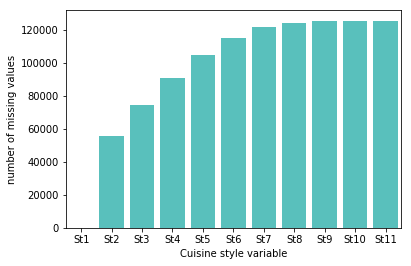

In [186]:
#Do we really need so many "Cuisine Style" variables?
#let's take a look to the number of null values we have for each "Cuisine Style" variable
styles=data[['St1','St2','St3','St4','St5','St6','St7','St8','St9','St10','St11']].isna().sum().reset_index()
f, ax = plt.subplots()
sns.barplot(x='index', y=0, data=styles, ax=ax, color='mediumturquoise')
ax=ax.set(ylabel="number of missing values", xlabel="Cuisine style variable")

In [187]:
# Analysing the previous barplot and completing that overview with the table,
# we have decided to keep only 4 "cuisine style variables", since the number of missing values 
# after that stabilizes a little bit more, and the percentage it's much smaller than the other variables.
# And we are assuming that the first 4 styles for each restaurant are the most important ones (since they are not in alphabetic order).
data.drop(['St5','St6','St7','St8','St9','St10','St11'],axis=1, inplace= True) 

In [189]:
# cleaning the rows that have as cuisine style 'a' (noisy data)
datafinal = data[data['Cuisine Style'] !='a']

In [188]:
#Our DataFrame shape:
datafinal.shape

(364976, 13)

####  2. We are going to deal with the missing values from Reviews variables:

Because we have two columns with reviews, our goal here is:</p>
Each restaurant must have at least one review, and for this to happen we only need to remove the rows where both Reviews columns have null values.

In [190]:
#Erasing the rows that have null in Review1 (because imediatly we know that review2 is also null)
datafinal = datafinal[~datafinal['Review1'].isnull()]

In [191]:
#Checking the shape of the data again:
datafinal.shape

(79381, 17)

####  3. We are going to deal with the rest of the missing values from the remaining variables:

First we want to know how many null values we have per row:

In [192]:
#how many filled values we have per row
datafinal['count_full'] = datafinal.apply(lambda x: x.count(), axis=1)
#how many null values we have per row
datafinal['null_values'] = (datafinal.shape[1]-1) - datafinal['count_full']

In [195]:
#how many rows do we have with each number of null values:
print("Number of null values per row with respective number of rows where that happens:")
datafinal.null_values.value_counts(ascending=True)

Number of null values per row with respective number of rows where that happens:


8        5
7      599
6     1530
5     2514
4     4079
3    11975
2    13297
1    13319
0    32061
Name: null_values, dtype: int64

In [193]:
#Erasing the rows with 8 or more null values:
datafinal=datafinal[datafinal['null_values']<=8]

Second, we have to decide what to do with the remaining missing values:

In [194]:
#so we look again to the first table, and we are going to see what we can do:
# How many null values do we have for each variable:
# Amount of NaN values for each feature
total = datafinal.isna().sum().sort_values(ascending=False)
# Percentage of total
percent = (datafinal.isna().sum()/datafinal.isna().count()*100).round(3).sort_values(ascending=False)
# Concatenating
nan_data2 = pd.concat({"Number of NaN's": total, '% of Total': percent}, axis=1)
nan_data2

,% of Total,Number of NaN's
St4,58.124,46138
St3,40.121,31848
St2,20.618,16366
Price Tag,9.761,7748
Review2,9.222,7320
Date_Review2,9.218,7317
Number of Reviews,1.721,1366
Ranking,0.038,30
Date_Review1,0.003,2
Rating,0.003,2


Since the variables 'Number of Reviews', 'Rating', 'Reviews2' and 'Price Tag' are important to our future analysis, for each one of them we are going to do the following:

In [196]:
#We assume that a null value in the Number of Reviews means that the restaurant doesn't have any review, so we fill with 0: 
datafinal['Number of Reviews'] = datafinal['Number of Reviews'].fillna(0)

In [197]:
#In the rating variable, we transform a null value into 0, and then we are going to consider only the restaurants 
#with the ratings between 1-5 (so we remove the restaurant with rating below or equal to 0):
datafinal['Rating'] = datafinal['Rating'].fillna(0)
datafinal = datafinal[datafinal['Rating']>0]

In [198]:
#In the price tag, because we don't have a number, we assume that we don't know the price (so it's unknown)
datafinal['Price Tag'] = datafinal['Price Tag'].fillna('unknown')

In [199]:
#Now, all the restaurants have reviews, but there are some of them that only have one, 
#so we put '-' in the column of review2 instead, of null:
datafinal['Review2'] = datafinal['Review2'].fillna('-')

In [200]:
#the final shape of the data
datafinal.shape

(79365, 19)

Now we have our data cleaned, although appears some missing values in some variables, we are going to ignore them because will not affect our analyse.

In the next steps, we are going to do two things:
* First, we want all cuisine styles in one column
* Second, we want reviews in one column

TREATING THE CUISINE STYLE:

In [201]:
#(So we will have repeated restaurants, because one restaurant has more than one cuisine style)
#putting all the cuisine styles in one dataframe
cuisinestyle1 = datafinal.filter(['ID_TA','City','Name','St1','Price Tag','Number of Reviews','Ranking'], axis=1)
cuisinestyle1.rename(columns = {'St1': 'Style'}, inplace = True)
cuisinestyle2 = datafinal.filter(['ID_TA','City','Name','St2','Price Tag','Number of Reviews','Ranking'], axis=1)
cuisinestyle2.rename(columns = {'St2': 'Style'}, inplace = True)
cuisinestyle3 = datafinal.filter(['ID_TA','City','Name','St3','Price Tag','Number of Reviews','Ranking'], axis=1)
cuisinestyle3.rename(columns = {'St3': 'Style'}, inplace = True)
cuisinestyle4 = datafinal.filter(['ID_TA','City','Name','St4','Price Tag','Number of Reviews','Ranking'], axis=1)
cuisinestyle4.rename(columns = {'St4': 'Style'}, inplace = True)

#the second final data frame
cuisinessty = cuisinestyle1.append([cuisinestyle2,cuisinestyle3,cuisinestyle4], ignore_index=True)

TREATING THE REVIEWS:

In [202]:
#putting all reviews in one dataframe
review1 = datafinal.filter(['ID_TA','Review1','Rating','Date_Review1'], axis=1)
review1.rename(columns = {'Review1': 'Review','Date_Review1': 'Date_Review'}, inplace = True)
review2 = datafinal.filter(['ID_TA','Review2','Rating','Date_Review2'], axis=1)
review2.rename(columns = {'Review2': 'Review','Date_Review2': 'Date_Review'}, inplace = True)
#removing the rows with (-)
review2 = review2[review2['Review']!='-']

#The third final dataframe
reviews = review1.append(review2, ignore_index=True)

In [203]:
#The final dataframe:
#putting together cuisine styles and reviews: 
datafinal = pd.merge(cuisinessty, reviews, on='ID_TA')

### Analysing Reviews:

In this chapter, we need to analyse the reviews, to see if they are positive, negative or neutral. For that task, we created an algorithm.

In [205]:
#First: removing the ponctuation
datafinal["Review"] = datafinal["Review"].str.replace('[^\w\s]','')

In [206]:
#applying the length of the review, maybe it's usuable for further analysis
datafinal['Review_length'] = datafinal['Review'].apply(len)

To perform our algorithm we need to import a list of positive and negative opinion words (or sentiment words). This two datasets were .txt files that we copied to excel documents.</p>
Source: 
* Positive Words from (http://ptrckprry.com/course/ssd/data/positive-words.txt)
* Negative Words from (http://ptrckprry.com/course/ssd/data/negative-words.txt)


In [207]:
#Second: importing the data
positive_words = pd.read_excel("positive-words.xlsx",header=None)
positive_words.rename(columns = {positive_words.columns[0]:'Positive_words'}, inplace = True)
negative_words = pd.read_excel("negative-words.xlsx",header=None)
negative_words.rename(columns = {negative_words.columns[0]:'Negative_words'}, inplace = True)

In [208]:
#turning the dataframes into sets
positive = set(positive_words['Positive_words'])
negative = set(negative_words['Negative_words'])

This is our algorithm performs on Reviews column, to set them as positive, neutral or negative:

* if the review has positive words, sum the number of positive words with +1
* if the review has negative words, sum the number of negative words with -1 
* if the review has negative and positive words, it's the sum of + and the - deppending on the number of words of each type (that sum can be 0 or not)
* if the review doesn't have any of these words it's 0 (So the review is neutral)

In [209]:
datafinal['count'] = datafinal['Review'].apply(lambda review: sum(0 + ((word in positive) and 1) 
                                                               + ((word in negative) and -1) for word in review.split()))

#we repeat for later:
datafinal['count2'] = datafinal['Review'].apply(lambda review: sum(0 + ((word in positive) and 1) 
                                                               + ((word in negative) and -1) for word in review.split()))

In [210]:
#We want to lable the output of the algorithm with positive, negative or neutral:
def set_review(row):
    if row["count2"] > 0: 
        return "positive"
    elif row["count2"] == 0:
        return "neutral"
    else:
        return "negative"

In [211]:
#assigning the labels to the second column 
datafinal = datafinal.assign(count2=datafinal.apply(set_review, axis=1))
datafinal.rename(columns = {'count2': 'Type_of_Review'}, inplace = True)

In [212]:
#the final dataframe with all the things that we will need:
datafinal.head(5)

,ID_TA,City,Name,Style,Price Tag,Number of Reviews,Ranking,Review,Rating,Date_Review,Review_length,count,Type_of_Review
0,d11752080,amsterdam,martine of martine's table,french,medium,136.0,1.0,just like home,5.0,2018-01-03,14,1,positive
1,d11752080,amsterdam,martine of martine's table,french,medium,136.0,1.0,a warm welcome to wintry amsterdam,5.0,2018-01-01,34,2,positive
2,d11752080,amsterdam,martine of martine's table,dutch,medium,136.0,1.0,just like home,5.0,2018-01-03,14,1,positive
3,d11752080,amsterdam,martine of martine's table,dutch,medium,136.0,1.0,a warm welcome to wintry amsterdam,5.0,2018-01-01,34,2,positive
4,d11752080,amsterdam,martine of martine's table,european,medium,136.0,1.0,just like home,5.0,2018-01-03,14,1,positive


In [219]:
cid = pd.read_csv('worldcities.csv', sep=",")  

In [107]:
datafinal = datafinal.merge(cid,on="City")

In [108]:
datafinal = datafinal[datafinal['Rating']>=3.0] 

In [109]:
datafinal.drop(['Country','AccentCity','Region','Population'],axis=1, inplace= True) 

In [221]:
datafinal

,ID_TA,City,Name,Style,Price Tag,Number of Reviews,Ranking,Review,Rating,Date_Review,Review_length,count,Type_of_Review
0,d11752080,amsterdam,martine of martine's table,french,medium,136.0,1.0,just like home,5.0,2018-01-03,14,1,positive
1,d11752080,amsterdam,martine of martine's table,french,medium,136.0,1.0,a warm welcome to wintry amsterdam,5.0,2018-01-01,34,2,positive
2,d11752080,amsterdam,martine of martine's table,dutch,medium,136.0,1.0,just like home,5.0,2018-01-03,14,1,positive
3,d11752080,amsterdam,martine of martine's table,dutch,medium,136.0,1.0,a warm welcome to wintry amsterdam,5.0,2018-01-01,34,2,positive
4,d11752080,amsterdam,martine of martine's table,european,medium,136.0,1.0,just like home,5.0,2018-01-03,14,1,positive
5,d11752080,amsterdam,martine of martine's table,european,medium,136.0,1.0,a warm welcome to wintry amsterdam,5.0,2018-01-01,34,2,positive
6,d11752080,amsterdam,martine of martine's table,None,medium,136.0,1.0,just like home,5.0,2018-01-03,14,1,positive
7,d11752080,amsterdam,martine of martine's table,None,medium,136.0,1.0,a warm welcome to wintry amsterdam,5.0,2018-01-01,34,2,positive
8,d693419,amsterdam,de silveren spiegel,dutch,expensive,812.0,2.0,great food and staff,4.5,2018-01-06,20,1,positive
9,d693419,amsterdam,de silveren spiegel,dutch,expensive,812.0,2.0,just perfect,4.5,2018-01-04,12,1,positive


In [112]:
#converting the final data frame to a .csv file, to use as data source for our recommendation algorithm
datafinal.to_csv("TripAdv1.csv", sep=',',encoding='utf-8' ,index=False)